#
1.What is the mean price of the cars in euros?


2 What is the median power in kilowatts (kW) among the cars?


3 What is the maximum fuel consumption in liters per 100 kilometers?


4.What is the minimum mileage covered by any car listed?


5.What is the mode of transmission type among the cars?


6.What is the range of power in horsepower (PS) among the cars?


7.what is the average of power in kw?


8.what is the average of power in ps?


9.What is Count of Cars by Brand?


10.What are the top five models with the highest average prices, and how do their prices compare to each other?


11.What is the count for each color and Which is The most common color among vehicles listed in the dataset?


12.What is the most repeated color for each brand?


13.How many vehicles were registered in each year?


14.What is the distribution of power in metric horsepower among the vehicles?


15.How has the average price changed over the years?


16.What is Average Price by Fuel Type?


17.What is the correlation coefficient between power in kilowatts (kW) and price in euros?


18.How does the distribution of mileage vary for different transmission types?


19.Are there any trends in fuel consumption based on the year and brand?


20.How does the average mileage vary with the year of production for each transmission type?


21.Is there a relationship between power (PS) and fuel consumption for different transmission types?


22.What is the correlation between power in kilowatts (kW) and fuel consumption in liters per 100 kilometers?


23.What is the proportion of cars with automatic transmission type?



In [1]:
import seaborn as sns
import csv
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm


# Read csv

In [2]:
df=pd.read_csv('gcar_data.csv')
df.head()

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,75721,ford,Ford Kuga,black,05/2023,2023,38490,140,190,Automatic,Hybrid,"5,4 l/100 km",124 g/km,100.0,ST-Line Hybrid Adapt.LED+Head-Up-Display Klima
1,80184,hyundai,Hyundai i10,black,09/2018,2018,11555,49,67,Manual,Petrol,"4,6 l/100 km",106 g/km,27782.0,"blue Trend,Viele Extras,Top-Zustand"
2,19864,audi,Audi Q4 e-tron,grey,05/2021,2021,48886,125,170,Automatic,Electric,NaN,0 g/km,4247.0,35 e-tron S line/Matrix/Pano/ACC/SONOS/LM 21
3,76699,honda,Honda CR-V,red,07/2018,2018,24490,114,155,Automatic,Petrol,"7,5 l/100 km",175 g/km,57000.0,2.0 Lifestyle Plus Automatik Navi FAP
4,92991,kia,Kia Sportage,black,02/2023,2023,34990,110,150,Manual,Petrol,"5,9 l/100 km",150 g/km,7500.0,"1.6 T 48V 2WD Spirit LED, WR"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                100000 non-null  int64  
 1   brand                     100000 non-null  object 
 2   model                     100000 non-null  object 
 3   color                     99924 non-null   object 
 4   registration_date         99999 non-null   object 
 5   year                      100000 non-null  object 
 6   price_in_euro             100000 non-null  object 
 7   power_kw                  99925 non-null   object 
 8   power_ps                  99928 non-null   object 
 9   transmission_type         100000 non-null  object 
 10  fuel_type                 100000 non-null  object 
 11  fuel_consumption_l_100km  88761 non-null   object 
 12  fuel_consumption_g_km     100000 non-null  object 
 13  mileage_in_km             99932 non-null   fl

#
# Missing Values

In [4]:

df.shape

(100000, 15)

In [5]:
df = pd.read_csv('gcar_data.csv')
df = df.dropna(thresh=df.shape[1]-10)
df.to_csv('gcar_data2.csv', index=False)

In [6]:
df.shape

(100000, 15)

#
#
# duplicating

In [7]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(100000, 15)

# cleaing

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                100000 non-null  int64  
 1   brand                     100000 non-null  object 
 2   model                     100000 non-null  object 
 3   color                     99924 non-null   object 
 4   registration_date         99999 non-null   object 
 5   year                      100000 non-null  object 
 6   price_in_euro             100000 non-null  object 
 7   power_kw                  99925 non-null   object 
 8   power_ps                  99928 non-null   object 
 9   transmission_type         100000 non-null  object 
 10  fuel_type                 100000 non-null  object 
 11  fuel_consumption_l_100km  88761 non-null   object 
 12  fuel_consumption_g_km     100000 non-null  object 
 13  mileage_in_km             99932 non-null   fl

#
#
#
# Handling datatype of registration_date

In [11]:
df['registration_date'].unique()

array(['05/2023', '09/2018', '05/2021', '07/2018', '02/2023', '09/2009',
       '01/2023', '05/2019', '09/2012', '10/2022', '07/2009', '07/2022',
       '10/2018', '11/2016', '08/2005', '09/1999', '07/2015', '06/2019',
       '10/2004', '04/2018', '01/2020', '07/2021', '01/2018', '02/2016',
       '03/2023', '10/2011', '11/2019', '04/2017', '11/2018', '01/2010',
       '02/2019', '06/2016', '06/2023', '05/2018', '04/2021', '05/2020',
       '07/2013', '06/2005', '09/2017', '07/2010', '10/2017', '03/2016',
       '04/2019', '12/2018', '08/2018', '03/2021', '11/2011', '08/2017',
       '02/2014', '03/2014', '09/2015', '01/2011', '09/2020', '06/2010',
       '03/2013', '06/2018', '03/2019', '10/2015', '01/2022', '11/2017',
       '09/2016', '01/2015', '11/2009', '06/2022', '01/2017', '10/2012',
       '12/2022', '07/2019', '07/2020', '04/2011', '02/2020', '02/2021',
       '03/2017', '03/2010', '11/2020', '10/2020', '07/2017', '04/2015',
       '03/2015', '10/2013', '03/2012', '10/2007', 

In [12]:
for date in df['registration_date'].unique():
    print(date)

05/2023
09/2018
05/2021
07/2018
02/2023
09/2009
01/2023
05/2019
09/2012
10/2022
07/2009
07/2022
10/2018
11/2016
08/2005
09/1999
07/2015
06/2019
10/2004
04/2018
01/2020
07/2021
01/2018
02/2016
03/2023
10/2011
11/2019
04/2017
11/2018
01/2010
02/2019
06/2016
06/2023
05/2018
04/2021
05/2020
07/2013
06/2005
09/2017
07/2010
10/2017
03/2016
04/2019
12/2018
08/2018
03/2021
11/2011
08/2017
02/2014
03/2014
09/2015
01/2011
09/2020
06/2010
03/2013
06/2018
03/2019
10/2015
01/2022
11/2017
09/2016
01/2015
11/2009
06/2022
01/2017
10/2012
12/2022
07/2019
07/2020
04/2011
02/2020
02/2021
03/2017
03/2010
11/2020
10/2020
07/2017
04/2015
03/2015
10/2013
03/2012
10/2007
12/2011
12/2019
09/2010
12/2010
10/2016
07/2011
10/2010
02/2015
08/2013
08/2022
09/2019
09/2021
06/2015
03/2020
03/2003
11/2013
05/2007
04/2023
04/2022
02/2018
01/2008
05/2022
05/2016
11/2021
01/2009
12/2013
04/2016
03/2018
10/2009
12/2020
12/2016
11/2012
05/2017
05/2009
05/2008
03/2004
02/2017
03/2005
06/2012
05/2012
09/2001
04/2014
08/2014


In [13]:
df['registration_date'] = pd.to_datetime(df['registration_date'], errors='coerce')

C:\Users\User\AppData\Local\Temp\ipykernel_14184\3350515707.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['registration_date'] = pd.to_datetime(df['registration_date'], errors='coerce')


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Unnamed: 0                100000 non-null  int64         
 1   brand                     100000 non-null  object        
 2   model                     100000 non-null  object        
 3   color                     99924 non-null   object        
 4   registration_date         99947 non-null   datetime64[ns]
 5   year                      100000 non-null  object        
 6   price_in_euro             100000 non-null  object        
 7   power_kw                  99925 non-null   object        
 8   power_ps                  99928 non-null   object        
 9   transmission_type         100000 non-null  object        
 10  fuel_type                 100000 non-null  object        
 11  fuel_consumption_l_100km  88761 non-null   object        
 12  fue

# 
#
#
#
#
# Handling datatype of year

In [15]:
df['year'].unique()

array(['2023', '2018', '2021', '2009', '2019', '2012', '2022', '2016',
       '2005', '1999', '2015', '2004', '2020', '2011', '2017', '2010',
       '2013', '2014', '2007', '2003', '2008', '2001', '1998', '2002',
       '2000', '2006', '1995', '1997', '1996', 'Manual', 'Petrol',
       'Diesel', '04/2017', 'Automatic', '113.000 km', '05/2017',
       'Hybrid', '3700', 'Electric', '01/2019', '06/2021', '8.000 km',
       '02/2020', '04/2006', 'LPG', '07/2021', '32.250 km', '03/2023',
       '12/2003'], dtype=object)

In [16]:
for year in df['year'].unique():
    print(year)

2023
2018
2021
2009
2019
2012
2022
2016
2005
1999
2015
2004
2020
2011
2017
2010
2013
2014
2007
2003
2008
2001
1998
2002
2000
2006
1995
1997
1996
Manual
Petrol
Diesel
04/2017
Automatic
113.000 km
05/2017
Hybrid
3700
Electric
01/2019
06/2021
8.000 km
02/2020
04/2006
LPG
07/2021
32.250 km
03/2023
12/2003


In [17]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['year'] = df['year'].fillna(0).astype(int)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Unnamed: 0                100000 non-null  int64         
 1   brand                     100000 non-null  object        
 2   model                     100000 non-null  object        
 3   color                     99924 non-null   object        
 4   registration_date         99947 non-null   datetime64[ns]
 5   year                      100000 non-null  int32         
 6   price_in_euro             100000 non-null  object        
 7   power_kw                  99925 non-null   object        
 8   power_ps                  99928 non-null   object        
 9   transmission_type         100000 non-null  object        
 10  fuel_type                 100000 non-null  object        
 11  fuel_consumption_l_100km  88761 non-null   object        
 12  fue

# 
#
#
#
#
#
# Handling datatype of price_in_euro

In [18]:
df['price_in_euro'].unique()

array(['38490', '11555', '48886', ..., '27555', '66930', '50299'],
      dtype=object)

In [19]:
for price in df['price_in_euro'].unique():
    print(price)

38490
11555
48886
24490
34990
5800
56390
18690
5300
17900
6800
87800
31900
26450
28888
17950
2999
3000
10000
14950
17500
19979
30980
68990
16980
19975
45850
32950
13000
16900
43950
31970
44900
14880
22650
18990
26500
63900
13991
56940
21990
59850
8400
4500
12791
44590
41950
17990
42880
41450
23980
21900
17884
20990
34195
334900
47333
13490
26540
31880
8990
30990
25490
32980
12500
27790
13500
44999
21499
15500
10730
27890
22940
18700
22770
12999
24790
21300
39999
44990
12990
19890
22288
17590
12799
37980
15999
12290
13950
22899
178000
139980
31490
46950
23500
16666
17890
299900
19990
27190
22900
4000
24500
28296
29480
749999
19479
24970
94850
14450
15950
61700
7600
14499
5900
75990
24890
21788
18849
23400
38680
9490
15799
42890
42490
13688
21690
44480
41999
8950
13390
76750
8000
19950
18900
38989
25799
7800
39500
12600
11900
32990
33950
17150
13600
64890
18450
43900
28990
6990
3400
317950
64444
89900
8700
18940
39203
31930
34200
8999
7400
31765
9990
14990
16898
18350
26150
18888
24980
2

In [20]:
df['price_in_euro']=pd.to_numeric(df['price_in_euro'],errors='coerce')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Unnamed: 0                100000 non-null  int64         
 1   brand                     100000 non-null  object        
 2   model                     100000 non-null  object        
 3   color                     99924 non-null   object        
 4   registration_date         99947 non-null   datetime64[ns]
 5   year                      100000 non-null  int32         
 6   price_in_euro             99946 non-null   float64       
 7   power_kw                  99925 non-null   object        
 8   power_ps                  99928 non-null   object        
 9   transmission_type         100000 non-null  object        
 10  fuel_type                 100000 non-null  object        
 11  fuel_consumption_l_100km  88761 non-null   object        
 12  fue

# 
#
#
#
#
# 
#
# Handling datatype of price_in_euro power_kw

In [21]:
df['power_kw'].unique()


array(['140', '49', '125', '114', '110', '103', '130', '88', '60', '67',
       '120', '290', '150', '77', '142', '74', '92', '245', '190', '118',
       '105', '85', '221', '195', '169', '147', '66', '104', '390', '70',
       '64', '295', '258', '272', '100', '471', '127', '154', '177',
       '280', '185', '99', '132', '135', '121', '287', '155', '51', '95',
       '260', '441', '220', '530', '141', '200', '566', '386', '73',
       '136', '375', '111', '268', nan, '145', '55', '240', '84', '210',
       '63', '225', '107', '206', '129', '294', '235', '405', '257',
       '377', '184', '80', '52', '160', '33', '87', '202', '81', '180',
       '133', '230', '331', '44', '213', '62', '59', '61', '96', '97',
       '122', '310', '275', '108', '283', '338', '162', '156', '300',
       '360', '188', '445', '170', '255', '115', '50', '46', '134', '243',
       '165', '227', '250', '90', '515', '344', '317', '183', '309',
       '171', '485', '423', '382', '381', '316', '176', '449', '460'

In [22]:
for price in df['power_kw'].unique():
    print(price)

140
49
125
114
110
103
130
88
60
67
120
290
150
77
142
74
92
245
190
118
105
85
221
195
169
147
66
104
390
70
64
295
258
272
100
471
127
154
177
280
185
99
132
135
121
287
155
51
95
260
441
220
530
141
200
566
386
73
136
375
111
268
nan
145
55
240
84
210
63
225
107
206
129
294
235
405
257
377
184
80
52
160
33
87
202
81
180
133
230
331
44
213
62
59
61
96
97
122
310
275
108
283
338
162
156
300
360
188
445
170
255
115
50
46
134
243
165
227
250
90
515
344
317
183
309
171
485
423
382
381
316
176
449
460
330
467
443
427
198
117
456
175
94
68
233
297
228
588
75
194
333
57
373
421
231
146
58
735
251
313
493
368
420
35
478
302
215
239
301
411
109
559
149
507
242
173
54
112
270
350
214
395
426
412
419
265
48
229
527
320
38
400
308
362
246
168
404
413
43
357
93
113
440
193
339
151
252
40
137
42
388
131
86
486
346
209
224
79
197
78
306
71
106
336
72
430
89
138
143
370
324
144
303
286
522
53
116
525
298
285
397
236
401
282
325
389
358
506
218
211
83
253
552
385
65
463
199
340
19
2016
353
82
269
541

In [23]:
df['power_kw']=pd.to_numeric(df['power_kw'],errors='coerce')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Unnamed: 0                100000 non-null  int64         
 1   brand                     100000 non-null  object        
 2   model                     100000 non-null  object        
 3   color                     99924 non-null   object        
 4   registration_date         99947 non-null   datetime64[ns]
 5   year                      100000 non-null  int32         
 6   price_in_euro             99946 non-null   float64       
 7   power_kw                  99884 non-null   float64       
 8   power_ps                  99928 non-null   object        
 9   transmission_type         100000 non-null  object        
 10  fuel_type                 100000 non-null  object        
 11  fuel_consumption_l_100km  88761 non-null   object        
 12  fue

# 
#
#
#
#
# 
#
#
# Handling datatype of price_in_euro power_ps


In [24]:
df['power_ps'].unique()

array(['190', '67', '170', '155', '150', '140', '177', '120', '82', '91',
       '163', '394', '204', '105', '193', '101', '125', '333', '258',
       '160', '143', '116', '300', '265', '230', '200', '90', '141',
       '530', '95', '87', '401', '351', '370', '136', '640', '173', '209',
       '241', '381', '252', '135', '179', '184', '165', '390', '211',
       '69', '129', '354', '600', '299', '721', '192', '272', '770',
       '525', '99', '185', '510', '151', '364', nan, '197', '75', '326',
       '114', '286', '86', '306', '145', '280', '175', '400', '320',
       '551', '349', '513', '250', '109', '71', '218', '45', '118', '275',
       '110', '245', '181', '313', '450', '60', '290', '84', '80', '83',
       '131', '132', '166', '421', '374', '147', '385', '460', '220',
       '212', '408', '489', '256', '605', '231', '347', '156', '68', '63',
       '182', '330', '224', '309', '340', '122', '700', '468', '431',
       '249', '420', '232', '659', '575', '519', '518', '430', '239'

In [25]:
for power in df['power_ps'].unique():
    print(power)

190
67
170
155
150
140
177
120
82
91
163
394
204
105
193
101
125
333
258
160
143
116
300
265
230
200
90
141
530
95
87
401
351
370
136
640
173
209
241
381
252
135
179
184
165
390
211
69
129
354
600
299
721
192
272
770
525
99
185
510
151
364
nan
197
75
326
114
286
86
306
145
280
175
400
320
551
349
513
250
109
71
218
45
118
275
110
245
181
313
450
60
290
84
80
83
131
132
166
421
374
147
385
460
220
212
408
489
256
605
231
347
156
68
63
182
330
224
309
340
122
700
468
431
249
420
232
659
575
519
518
430
239
610
625
449
635
602
581
269
159
620
238
128
92
317
404
310
799
102
264
453
77
507
572
314
199
79
999
341
426
670
500
571
48
650
411
292
325
409
559
148
760
203
689
329
235
73
152
367
476
291
537
579
560
570
360
65
311
717
435
52
544
419
492
334
228
549
562
58
485
126
154
598
262
461
205
343
54
186
57
528
178
117
661
470
284
305
107
268
106
416
97
144
457
98
585
121
188
194
503
441
196
412
389
710
72
158
714
405
387
540
321
545
383
442
529
487
688
296
287
113
344
751
523
88
630
271
462


In [26]:
df['power_ps']=pd.to_numeric(df['power_ps'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Unnamed: 0                100000 non-null  int64         
 1   brand                     100000 non-null  object        
 2   model                     100000 non-null  object        
 3   color                     99924 non-null   object        
 4   registration_date         99947 non-null   datetime64[ns]
 5   year                      100000 non-null  int32         
 6   price_in_euro             99946 non-null   float64       
 7   power_kw                  99884 non-null   float64       
 8   power_ps                  99907 non-null   float64       
 9   transmission_type         100000 non-null  object        
 10  fuel_type                 100000 non-null  object        
 11  fuel_consumption_l_100km  88761 non-null   object        
 12  fue

# 
#
#
#
#
# 
#
#
# Handling Values of  fuel_type

In [27]:
df['fuel_type'].unique()

array(['Hybrid', 'Petrol', 'Electric', 'Diesel', 'LPG', 'Diesel Hybrid',
       'Other', 'CNG', 'Unknown', 'Hydrogen', '160.629 km', '04/2008',
       '01/2016', 'Ethanol', '10/2022', '12/2014', '06/2004', 'Automatic',
       '108.313 km', '74.194 km', '05/2009', '12890', '264.000 km',
       '300.000 km', '04/2013', '03/2019', 'Manual', '11/2021',
       'KETTE NEUE', '110.250 km', '06/2023', '03/2018', '180.000 km',
       '20.600 km', '144.919 km', '08/2014', '03/2017', '12/2012',
       '12/2019', '07/2022', '25890', '04/2022', '12/2016', '07/2007',
       '05/2015', '145.500 km', '11/2018', '07/2004', '08/2018',
       '06/2014', '03/2014', '02/2017', '19450', '09/2009'], dtype=object)

In [28]:
df['fuel_type'] = df['fuel_type'].astype(str)
def contains_digit(value):
    return any(char.isdigit() for char in value)
df['fuel_type'] = df['fuel_type'].apply(lambda x: 'Unknown' if contains_digit(x) else x)


In [29]:
df['fuel_type'].unique()

array(['Hybrid', 'Petrol', 'Electric', 'Diesel', 'LPG', 'Diesel Hybrid',
       'Other', 'CNG', 'Unknown', 'Hydrogen', 'Ethanol', 'Automatic',
       'Manual', 'KETTE NEUE'], dtype=object)

# 
#
#
#
#
# 
#
#
#
# Handling data type of  fuel_consumption_l_100km

In [30]:
df['fuel_consumption_l_100km'].unique()

array(['5,4 l/100 km', '4,6 l/100 km', nan, '7,5 l/100 km',
       '5,9 l/100 km', '6,7 l/100 km', '8,9 l/100 km', '5,6 l/100 km',
       '5 l/100 km', '7,4 l/100 km', '8,2 l/100 km', '9,4 l/100 km',
       '3,8 l/100 km', '5,3 l/100 km', '6,9 l/100 km', '7,2 l/100 km',
       '8,4 l/100 km', '4,7 l/100 km', '6,1 l/100 km', '6,3 l/100 km',
       '4,9 l/100 km', '4,8 l/100 km', '4,5 l/100 km', '6,2 l/100 km',
       '6,6 l/100 km', '9,3 l/100 km', '4,1 l/100 km', '8,3 l/100 km',
       '4,4 l/100 km', '9,9 l/100 km', '4,3 l/100 km', '6,4 l/100 km',
       '7,6 l/100 km', '7,9 l/100 km', '5,8 l/100 km', '2 l/100 km',
       '12,3 l/100 km', '5,5 l/100 km', '5,2 l/100 km', '6 l/100 km',
       '6,8 l/100 km', '5,1 l/100 km', '7,8 l/100 km', '0 kWh/100 km',
       '3,9 l/100 km', '12,1 l/100 km', '17,9 l/100 km', '12,7 l/100 km',
       '10,2 l/100 km', '1,8 l/100 km', '3,5 l/100 km', '8,1 l/100 km',
       '11,7 l/100 km', '11 l/100 km', '16,9 l/100 km', '7,7 l/100 km',
       '6,5 l/100

In [31]:
def convert_to_numerical(value):
    if isinstance(value, float):
        return value  
    elif 'l/100 km' in value:
        value = value.replace(' l/100 km', '').replace(',', '.')
        try:
            return float(value)
        except ValueError:
            return None
    else:
        return None

df['fuel_consumption_l_100km'] = df['fuel_consumption_l_100km'].apply(lambda x: convert_to_numerical(x))


In [32]:
df['fuel_consumption_l_100km'].unique()

array([  5.4,   4.6,   nan,   7.5,   5.9,   6.7,   8.9,   5.6,   5. ,
         7.4,   8.2,   9.4,   3.8,   5.3,   6.9,   7.2,   8.4,   4.7,
         6.1,   6.3,   4.9,   4.8,   4.5,   6.2,   6.6,   9.3,   4.1,
         8.3,   4.4,   9.9,   4.3,   6.4,   7.6,   7.9,   5.8,   2. ,
        12.3,   5.5,   5.2,   6. ,   6.8,   5.1,   7.8,   3.9,  12.1,
        17.9,  12.7,  10.2,   1.8,   3.5,   8.1,  11.7,  11. ,  16.9,
         7.7,   6.5,   5.7,   7.1,   7. ,   4. ,   1.4,   4.2,   8.7,
         9.5,  10.1,   7.3,   8. ,  12. ,   9.6,   8.5,  15.8,  12.8,
         9. ,   8.8,   9.7,  14.7,   1.3,  10.7,  17.2,  14.6,  11.5,
         9.8,  13.6,  10.5,  13.8,  11.1,  10.3,   1.9,   1.1,  14.3,
        13.4,   3.6,  19. ,  12.5,  12.2,  21.3,  14.1,   2.1,  10.4,
         1.7,  13.3,  14.4,   3.2,  14. ,   2.3,   1.2,  10. ,  11.8,
         2.2,  12.6,   1.6,   1.5,  11.2,  17.1,   8.6,  11.9,  11.4,
        15.3,   9.2,  17. ,  18. ,  19.5,  21.5,  13.7,  14.2,   0.6,
        10.6,  11.6,

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Unnamed: 0                100000 non-null  int64         
 1   brand                     100000 non-null  object        
 2   model                     100000 non-null  object        
 3   color                     99924 non-null   object        
 4   registration_date         99947 non-null   datetime64[ns]
 5   year                      100000 non-null  int32         
 6   price_in_euro             99946 non-null   float64       
 7   power_kw                  99884 non-null   float64       
 8   power_ps                  99907 non-null   float64       
 9   transmission_type         100000 non-null  object        
 10  fuel_type                 100000 non-null  object        
 11  fuel_consumption_l_100km  87972 non-null   float64       
 12  fue

In [34]:
df.drop(columns=['fuel_consumption_g_km'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Unnamed: 0                100000 non-null  int64         
 1   brand                     100000 non-null  object        
 2   model                     100000 non-null  object        
 3   color                     99924 non-null   object        
 4   registration_date         99947 non-null   datetime64[ns]
 5   year                      100000 non-null  int32         
 6   price_in_euro             99946 non-null   float64       
 7   power_kw                  99884 non-null   float64       
 8   power_ps                  99907 non-null   float64       
 9   transmission_type         100000 non-null  object        
 10  fuel_type                 100000 non-null  object        
 11  fuel_consumption_l_100km  87972 non-null   float64       
 12  mil

# 
#
#
#
#
# 
#
#
#
#
# Handling Missing Values

In [35]:
df.isnull().sum()

Unnamed: 0                      0
brand                           0
model                           0
color                          76
registration_date              53
year                            0
price_in_euro                  54
power_kw                      116
power_ps                       93
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    12028
mileage_in_km                  68
offer_description               0
dtype: int64

# 
#
#
#
#
# 
#
#
#
#
# Handling Missing Values of color  

In [36]:
most_common_color = df['color'].mode()[0]
df['color'].fillna(most_common_color, inplace=True)
df.isnull().sum()

C:\Users\User\AppData\Local\Temp\ipykernel_14184\1077689839.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['color'].fillna(most_common_color, inplace=True)


Unnamed: 0                      0
brand                           0
model                           0
color                           0
registration_date              53
year                            0
price_in_euro                  54
power_kw                      116
power_ps                       93
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    12028
mileage_in_km                  68
offer_description               0
dtype: int64

# 
#
#
#
#
# 
#
#
#
#
# Handling Missing Values of registration_date

In [37]:
most_common_date = df['registration_date'].mode()[0]
df['registration_date'].fillna(most_common_date, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_14184\873725420.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['registration_date'].fillna(most_common_date, inplace=True)


In [38]:

df['price_in_euro'].fillna(df['price_in_euro'].mean(), inplace=True)
df['power_kw'].fillna(df['power_kw'].median(), inplace=True)
df['power_ps'].fillna(df['power_ps'].mean(), inplace=True)
df['fuel_consumption_l_100km'].fillna(df['fuel_consumption_l_100km'].mean(), inplace=True)
df.dropna(subset=['mileage_in_km'], inplace=True)
df.isnull().sum()



C:\Users\User\AppData\Local\Temp\ipykernel_14184\3301337938.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price_in_euro'].fillna(df['price_in_euro'].mean(), inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_14184\3301337938.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

Unnamed: 0                  0
brand                       0
model                       0
color                       0
registration_date           0
year                        0
price_in_euro               0
power_kw                    0
power_ps                    0
transmission_type           0
fuel_type                   0
fuel_consumption_l_100km    0
mileage_in_km               0
offer_description           0
dtype: int64

# Outlieries

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99932 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                99932 non-null  int64         
 1   brand                     99932 non-null  object        
 2   model                     99932 non-null  object        
 3   color                     99932 non-null  object        
 4   registration_date         99932 non-null  datetime64[ns]
 5   year                      99932 non-null  int32         
 6   price_in_euro             99932 non-null  float64       
 7   power_kw                  99932 non-null  float64       
 8   power_ps                  99932 non-null  float64       
 9   transmission_type         99932 non-null  object        
 10  fuel_type                 99932 non-null  object        
 11  fuel_consumption_l_100km  99932 non-null  float64       
 12  mileage_in_km          

# 
# Handling outliers using IQR method 

In [40]:

df.head()

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km,offer_description
0,75721,ford,Ford Kuga,black,2023-05-01,2023,38490.0,140.0,190.0,Automatic,Hybrid,5.40000,100.0,ST-Line Hybrid Adapt.LED+Head-Up-Display Klima
1,80184,hyundai,Hyundai i10,black,2018-09-01,2018,11555.0,49.0,67.0,Manual,Petrol,4.60000,27782.0,"blue Trend,Viele Extras,Top-Zustand"
2,19864,audi,Audi Q4 e-tron,grey,2021-05-01,2021,48886.0,125.0,170.0,Automatic,Electric,6.26676,4247.0,35 e-tron S line/Matrix/Pano/ACC/SONOS/LM 21
3,76699,honda,Honda CR-V,red,2018-07-01,2018,24490.0,114.0,155.0,Automatic,Petrol,7.50000,57000.0,2.0 Lifestyle Plus Automatik Navi FAP
4,92991,kia,Kia Sportage,black,2023-02-01,2023,34990.0,110.0,150.0,Manual,Petrol,5.90000,7500.0,"1.6 T 48V 2WD Spirit LED, WR"


In [41]:
df['fuel_consumption_l_100km'].describe()

count    99932.000000
mean         6.266933
std          2.223559
min          0.000000
25%          5.100000
50%          6.000000
75%          6.800000
max        141.000000
Name: fuel_consumption_l_100km, dtype: float64

<Axes: ylabel='fuel_consumption_l_100km'>

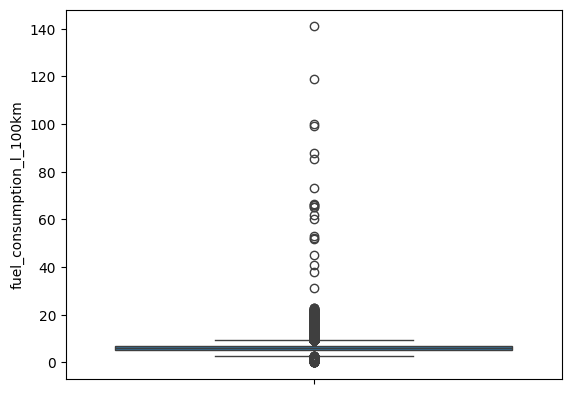

In [42]:
sns.boxplot(df['fuel_consumption_l_100km'])

In [43]:
q1=df['fuel_consumption_l_100km'].quantile(0.25)
q3=df['fuel_consumption_l_100km'].quantile(0.75)
iqr=q3-q1

In [44]:
q1,q3,iqr

(5.1, 6.8, 1.7000000000000002)

In [45]:
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
lower_limit,upper_limit

(2.5499999999999994, 9.35)

In [46]:
df.loc[(df['fuel_consumption_l_100km'] > upper_limit) | (df['fuel_consumption_l_100km'] < lower_limit)]

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km,offer_description
17,1761,audi,Audi A4,silver,1999-09-01,1999,3000.0,142.0,193.0,Manual,Petrol,9.4,449000.0,Avant 2.8
42,40163,bmw,BMW 550,blue,2020-05-01,2020,59850.0,390.0,530.0,Automatic,Petrol,9.9,67136.0,M550i xDrive Limousine Head-Up HK HiFi WLAN AHK
55,39691,bmw,BMW 225,silver,2019-04-01,2019,34195.0,100.0,136.0,Automatic,Hybrid,2.0,23000.0,xe iPerformance Active Tourer M Sport
56,93702,lamborghini,Lamborghini Huracan,red,2018-08-01,2018,334900.0,471.0,640.0,Automatic,Petrol,12.3,13819.0,Performante Spyder LP 640-4
93,19966,audi,Audi RS Q8,green,2021-04-01,2021,139980.0,441.0,600.0,Automatic,Petrol,12.1,53617.0,Dynamikpaket+*Pano*Keramik*Carbon*AHK*
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99883,52251,ferrari,Ferrari 488,black,2016-07-01,2016,219900.0,493.0,670.0,Automatic,Petrol,11.4,30891.0,RacingSeats/FullCarbon/JBL/Camera
99900,40774,bmw,BMW 330,silver,2020-01-01,2020,42981.0,135.0,184.0,Automatic,Hybrid,1.9,25955.0,e Advantage Lim. (G20)
99915,23247,bentley,Bentley Continental,black,2021-10-01,2021,259680.0,405.0,551.0,Automatic,Petrol,11.7,3500.0,GTC V8 *Mulliner*Touring*
99933,40757,bmw,BMW X3,silver,2020-05-01,2020,50990.0,215.0,292.0,Automatic,Hybrid,2.1,29918.0,xDrive30e M-Sport*Park Ass Plus*Panoramadach*D...


In [47]:
mean_value = df['fuel_consumption_l_100km'].mean()
outlier_rows = df.loc[(df['fuel_consumption_l_100km'] > upper_limit) | (df['fuel_consumption_l_100km'] < lower_limit)]
df.loc[outlier_rows.index, 'fuel_consumption_l_100km'] = mean_value

In [48]:
df.loc[(df['fuel_consumption_l_100km'] > upper_limit) | (df['fuel_consumption_l_100km'] < lower_limit)]

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km,offer_description


<Axes: ylabel='fuel_consumption_l_100km'>

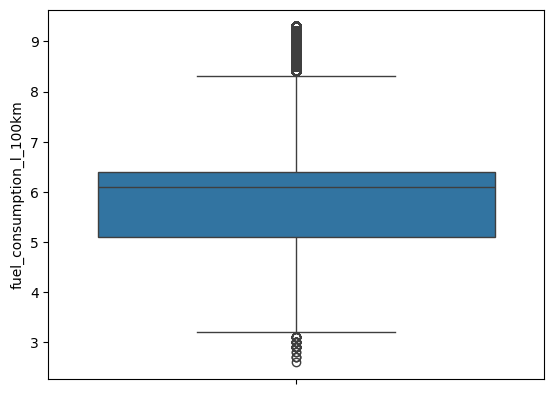

In [49]:
sns.boxplot(df['fuel_consumption_l_100km'])

In [50]:
df['power_kw'].describe()

count    99932.000000
mean       140.492125
std         83.075272
min          1.000000
25%         88.000000
50%        117.000000
75%        160.000000
max       2010.000000
Name: power_kw, dtype: float64

In [51]:
q1=df['power_kw'].quantile(0.25)
q3=df['power_kw'].quantile(0.75)
iqr=q3-q1
q1,q3,iqr

(88.0, 160.0, 72.0)

In [52]:
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
lower_limit,upper_limit

(-20.0, 268.0)

In [53]:
df.loc[(df['power_kw'] > upper_limit) | (df['power_kw'] < lower_limit)]
median_value = df['power_kw'].median()
outlier_rows = df.loc[(df['power_kw'] > upper_limit) | (df['power_kw'] < lower_limit)]
df.loc[outlier_rows.index, 'power_kw'] = median_value
df.loc[(df['power_kw'] > upper_limit) | (df['power_kw'] < lower_limit)]

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km,offer_description


<Axes: ylabel='power_kw'>

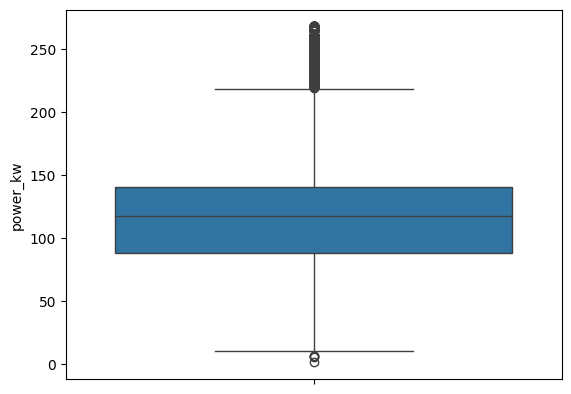

In [54]:
sns.boxplot(df['power_kw'])

In [55]:
df['year'].describe()

count    99932.000000
mean      2015.752762
std         37.003219
min          0.000000
25%       2014.000000
50%       2018.000000
75%       2020.000000
max       2023.000000
Name: year, dtype: float64

In [56]:
median_year = df.loc[df['year'] != 0.000000, 'year'].median()
df.loc[df['year'] == 0.000000, 'year'] = median_year
df['year'].describe()

count    99932.000000
mean      2016.419155
std          5.195616
min       1995.000000
25%       2014.000000
50%       2018.000000
75%       2020.000000
max       2023.000000
Name: year, dtype: float64

<Axes: ylabel='power_ps'>

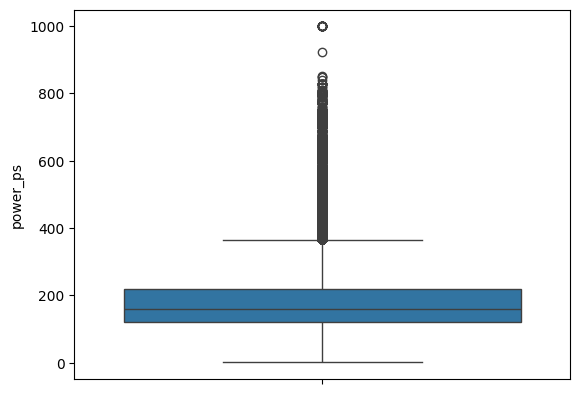

In [57]:
sns.boxplot(df['power_ps'])

<Axes: ylabel='mileage_in_km'>

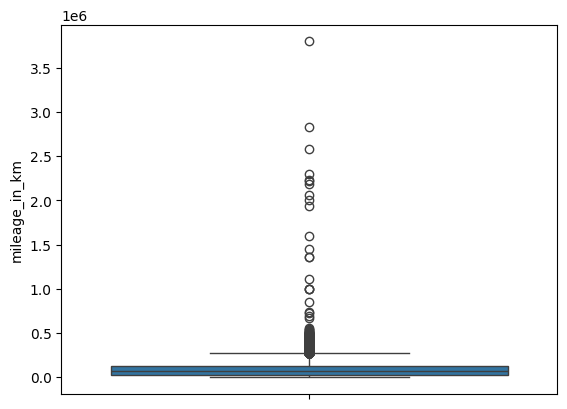

In [58]:
sns.boxplot(df['mileage_in_km'])

In [59]:
q1=df['mileage_in_km'].quantile(0.25)
q3=df['mileage_in_km'].quantile(0.75)
iqr=q3-q1
q1,q3,iqr

(25500.0, 127000.0, 101500.0)

In [60]:
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
lower_limit,upper_limit

(-126750.0, 279250.0)

<Axes: ylabel='mileage_in_km'>

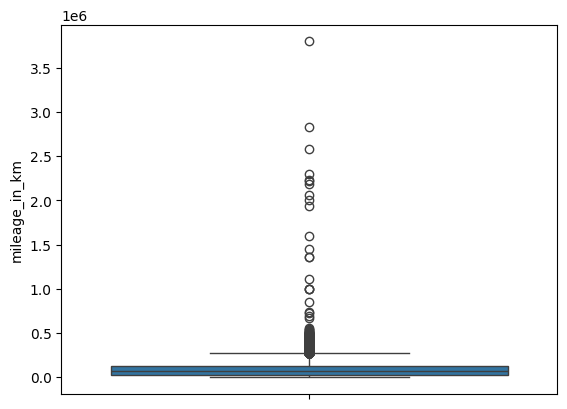

In [61]:
sns.boxplot(df['mileage_in_km'])

<Axes: ylabel='mileage_in_km'>

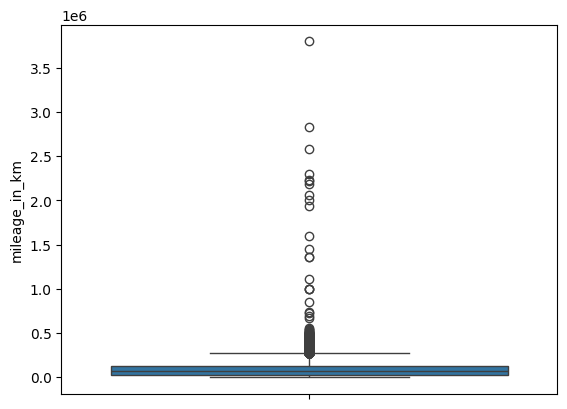

In [62]:
sns.boxplot(df['mileage_in_km'])

In [63]:
df.loc[(df['mileage_in_km'] > upper_limit) | (df['mileage_in_km'] < lower_limit)]
median_value = df['mileage_in_km'].median()
outlier_rows = df.loc[(df['mileage_in_km'] > upper_limit) | (df['mileage_in_km'] < lower_limit)]
df.loc[outlier_rows.index, 'mileage_in_km'] = median_value
df.loc[(df['mileage_in_km'] > upper_limit) | (df['mileage_in_km'] < lower_limit)]

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km,offer_description


<Axes: ylabel='mileage_in_km'>

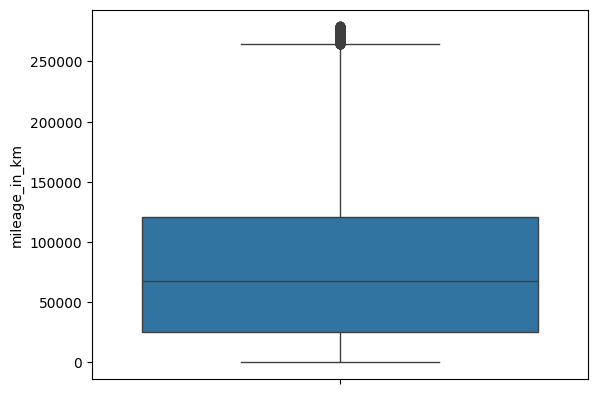

In [64]:
sns.boxplot(df['mileage_in_km'])

# 
# Question

1. What is the mean price of the cars in euros?


In [65]:
mean_price_euro = df['price_in_euro'].mean()
print(mean_price_euro)


29417.420521300068


2. What is the median power in kilowatts (kW) among the cars?


In [66]:
median_power_kw = df['power_kw'].median()
print(median_power_kw)


117.0


3. What is the maximum fuel consumption in liters per 100 kilometers?


In [67]:
max_fuel_consumption_l_100km = df['fuel_consumption_l_100km'].max()
print(max_fuel_consumption_l_100km)


9.3


4. What is the minimum mileage covered by any car listed?


In [68]:
min_mileage_km = df['mileage_in_km'].min()
print(min_mileage_km)


0.0


5. What is the mode of transmission type among the cars?


In [69]:
mode_transmission_type = df['transmission_type'].mode()[0]
print(mode_transmission_type)


Automatic


6.What is the range of power in horsepower (PS) among the cars?


In [70]:
power_range_ps = df['power_ps'].max() - df['power_ps'].min()
print(power_range_ps)


998.0


7.what is the average of power in kw?

In [71]:
mean_power_in_kw = df['power_kw'].mean()
print(mean_price_euro)

29417.420521300068


8.what is the average of power in ps?

In [72]:
mean_power_in_kw = df['power_kw'].mean()
print(mean_price_euro)

29417.420521300068


9.What is Count of Cars by Brand?

brand
audi            21157
bmw             19805
ford            18781
hyundai          6984
kia              5733
fiat             5037
citroen          4077
dacia            3340
land-rover       3073
mazda            2188
jeep             1743
alfa-romeo       1436
jaguar           1398
honda             785
maserati          698
dodge             669
ferrari           590
bentley           541
lamborghini       361
aston-martin      277
isuzu             206
daihatsu          204
chevrolet         191
lada              191
cadillac          157
infiniti          112
lancia            105
daewoo             61
chrysler           32
Name: count, dtype: int64


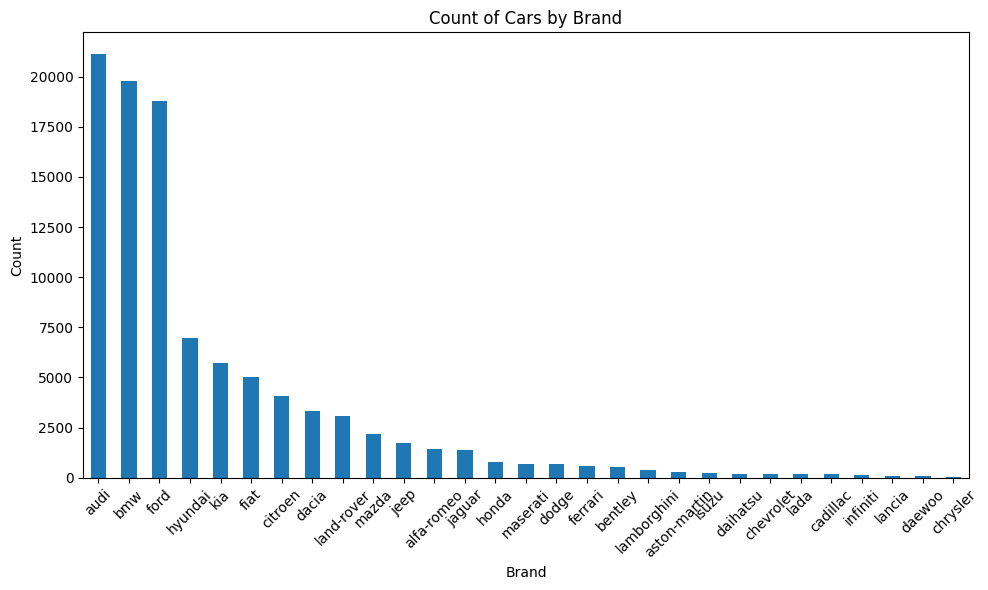

In [73]:
brand_counts = df['brand'].value_counts()
print(brand_counts)

plt.figure(figsize=(10, 6))
brand_counts.plot(kind='bar')
plt.title('Count of Cars by Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

10.What are the top five models with the highest average prices, and how do their prices compare to each other?


model
Lamborghini              1.364469e+06
Aston Martin Lagonda     8.599900e+05
Ford GT                  8.499000e+05
Ferrari SF90 Spider      7.319560e+05
Lamborghini Aventador    5.350452e+05
Name: price_in_euro, dtype: float64


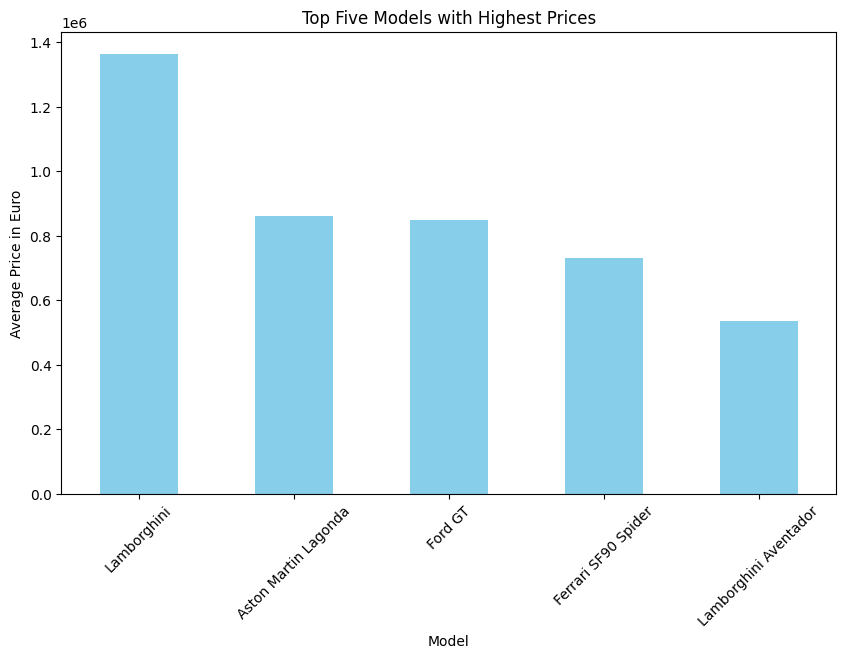

In [74]:
average_price_by_model = df.groupby('model')['price_in_euro'].mean()
top_five_models_highest_price = average_price_by_model.sort_values(ascending=False).head(5)
print(top_five_models_highest_price)

plt.figure(figsize=(10, 6))
top_five_models_highest_price.plot(kind='bar', color='skyblue')
plt.xlabel('Model')
plt.ylabel('Average Price in Euro')
plt.title('Top Five Models with Highest Prices')
plt.xticks(rotation=45)
plt.show()

11.What is the count for each color and Which is The most common color among vehicles listed in the dataset?

color
black     24184
grey      19673
white     17252
blue      12671
silver    11721
red        8117
brown      1743
green      1405
orange     1147
yellow      806
beige       723
gold        190
bronze      158
violet      142
Name: count, dtype: int64
The most common color among vehicles listed in the dataset is 'black' with 24184 occurrences.


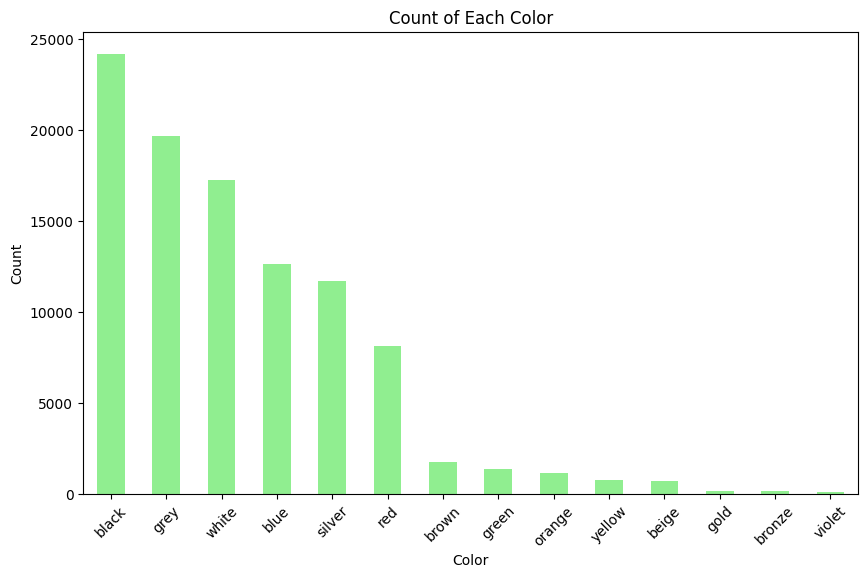

In [75]:
color_counts = df['color'].value_counts()
print(color_counts)

most_common_color = color_counts.idxmax()
most_common_color_count = color_counts.max()
print(f"The most common color among vehicles listed in the dataset is '{most_common_color}' with {most_common_color_count} occurrences.")


plt.figure(figsize=(10, 6))
color_counts.plot(kind='bar', color='lightgreen')
plt.xlabel('Color')
plt.ylabel('Count')
plt.title('Count of Each Color')
plt.xticks(rotation=45)
plt.show()


12.What is the most repeated color for each brand?

           brand   color
0     alfa-romeo   black
1   aston-martin   black
2           audi   black
3        bentley   black
4            bmw   black
5       cadillac   black
6      chevrolet   black
7       chrysler    grey
8        citroen   white
9          dacia    grey
10        daewoo  silver
11      daihatsu  silver
12         dodge   black
13       ferrari     red
14          fiat   white
15          ford  silver
16         honda   black
17       hyundai   white
18      infiniti   black
19         isuzu    grey
20        jaguar   black
21          jeep   black
22           kia   white
23          lada   green
24   lamborghini   black
25        lancia   black
26    land-rover   black
27      maserati   black
28         mazda    grey


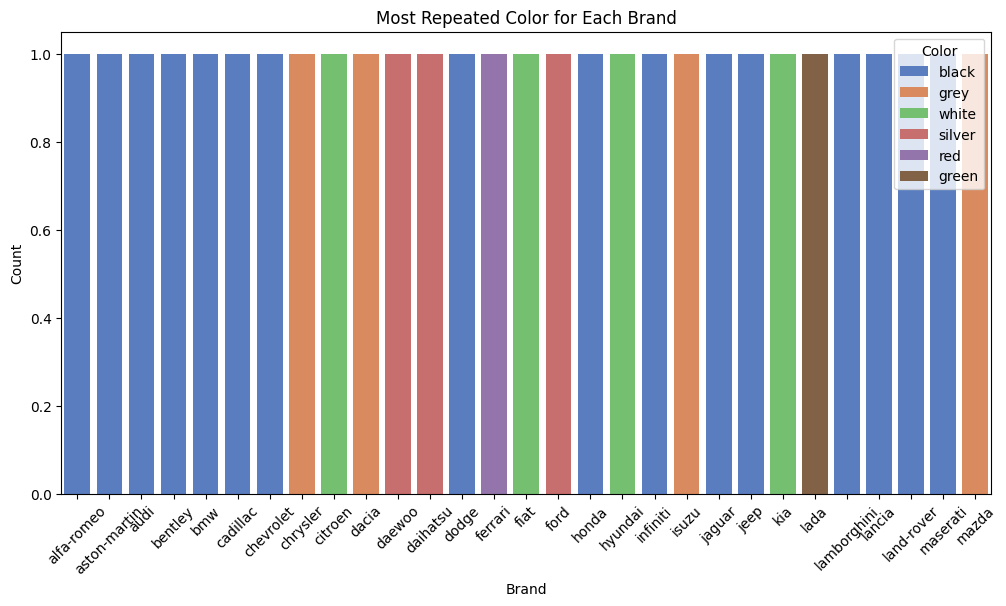

In [76]:
most_repeated_color = df.groupby('brand')['color'].agg(lambda x: x.mode().iloc[0]).reset_index()
print(most_repeated_color)

plt.figure(figsize=(12, 6))
sns.countplot(data=most_repeated_color, x='brand', hue='color', palette='muted')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Most Repeated Color for Each Brand')
plt.xticks(rotation=45)
plt.legend(title='Color')
plt.show()

13.How many vehicles were registered in each year?

registration_date
1995       25
1996       42
1997      115
1998      169
1999      246
2000      298
2001      387
2002      466
2003      674
2004      926
2005     1124
2006     1443
2007     1463
2008     1788
2009     2420
2010     2351
2011     3086
2012     3310
2013     3563
2014     4527
2015     5341
2016     6768
2017     7869
2018    10006
2019    12056
2020     7407
2021     5846
2022     7557
2023     8659
Name: count, dtype: int64


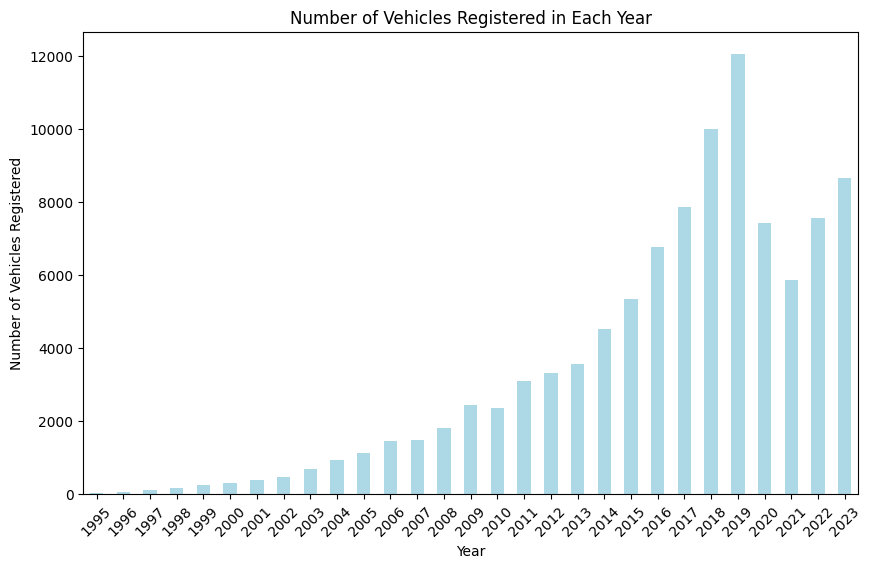

In [77]:
vehicles_registered_per_year = df['registration_date'].dt.year.value_counts().sort_index()
print(vehicles_registered_per_year)

plt.figure(figsize=(10, 6))
vehicles_registered_per_year.plot(kind='bar', color='lightblue')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles Registered')
plt.title('Number of Vehicles Registered in Each Year')
plt.xticks(rotation=45)
plt.show()

14.What is the distribution of power in metric horsepower among the vehicles?

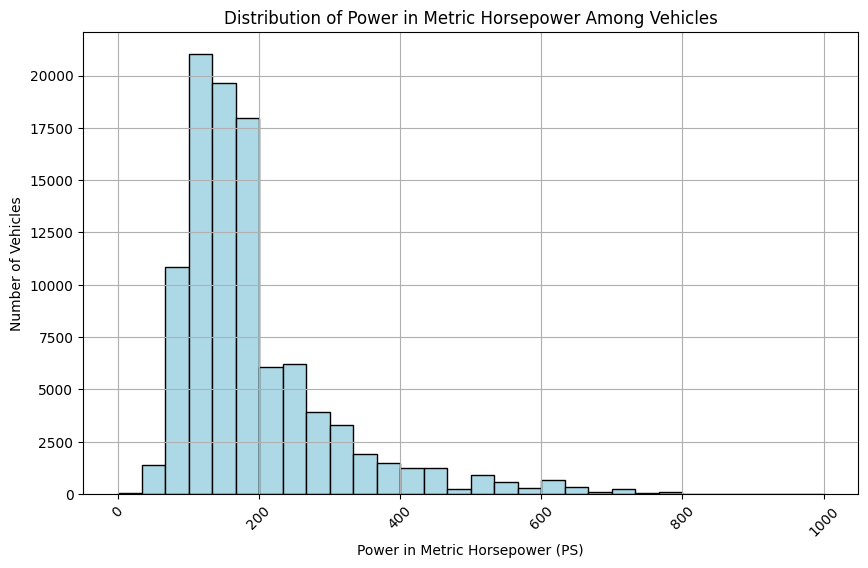

In [78]:

plt.figure(figsize=(10, 6))
plt.hist(df['power_ps'], bins=30, color='lightblue', edgecolor='black')
plt.xlabel('Power in Metric Horsepower (PS)')
plt.ylabel('Number of Vehicles')
plt.title('Distribution of Power in Metric Horsepower Among Vehicles')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

15.How has the average price changed over the years?


year
1995    25042.560000
1996    45871.142857
1997    16729.556522
1998    14399.360947
1999    11068.487805
2000    17557.040268
2001    14195.684755
2002    11811.796137
2003     9765.637982
2004     7242.757019
2005     9042.541815
2006     8892.153153
2007    10471.291183
2008    12197.021812
2009     9984.116529
2010    13233.255211
2011    15294.077447
2012    15988.290937
2013    16526.351951
2014    17977.734924
2015    21548.940273
2016    22874.853723
2017    25498.077901
2018    29252.134230
2019    32383.086098
2020    39418.960038
2021    47290.677386
2022    53597.556967
2023    48308.072108
Name: price_in_euro, dtype: float64


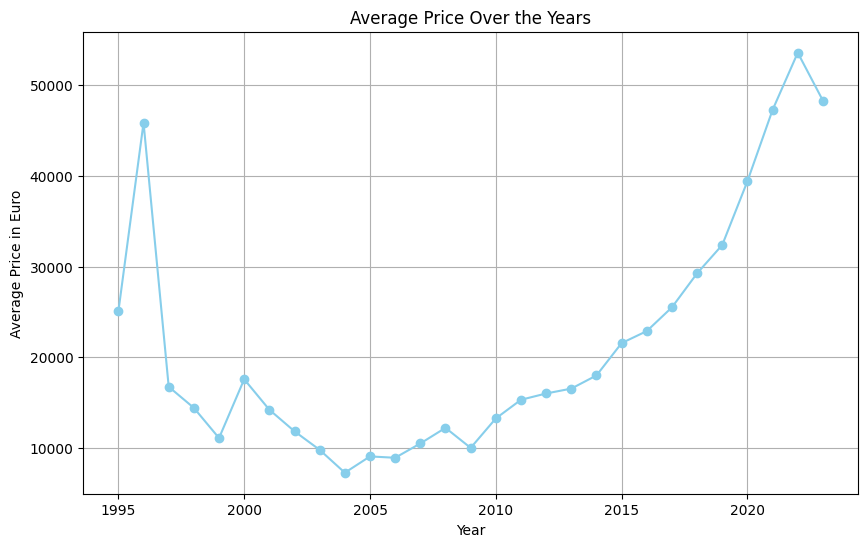

In [79]:
average_price_by_year = df.groupby('year')['price_in_euro'].mean()
print(average_price_by_year)


plt.figure(figsize=(10, 6))
average_price_by_year.plot(kind='line', marker='o', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Average Price in Euro')
plt.title('Average Price Over the Years')
plt.grid(True)
plt.show()

16.What is Average Price by Fuel Type?


fuel_type
Ethanol          11923.111111
CNG              17938.918033
Diesel           25079.742179
LPG              27752.649237
Manual           29416.198017
Petrol           30819.630157
Other            32900.583333
Diesel Hybrid    41454.430657
Hydrogen         41484.692308
Hybrid           41596.210784
Electric         43007.906948
Unknown          46547.082293
Name: price_in_euro, dtype: float64


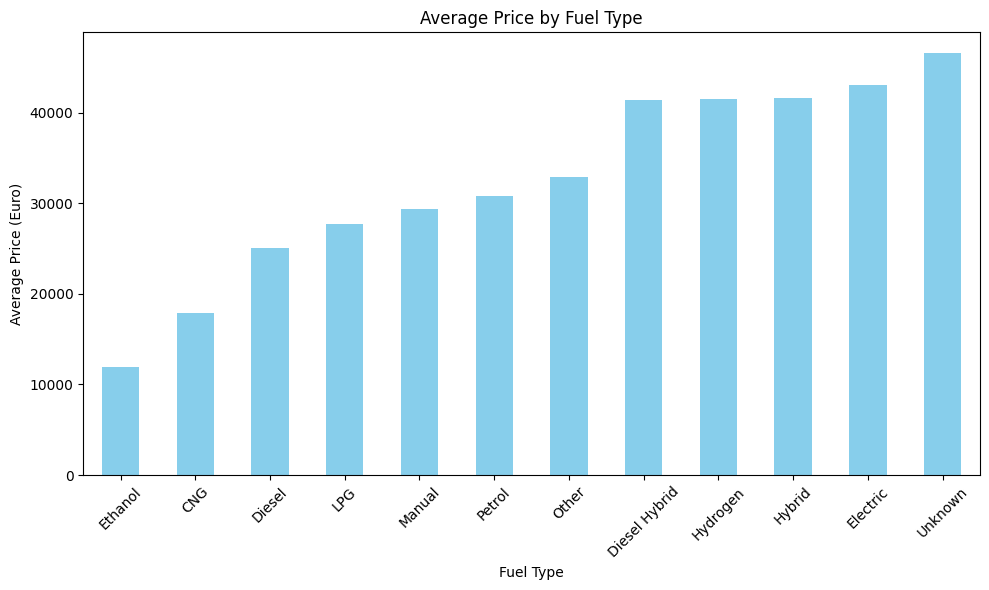

In [80]:

average_price_by_fuel_type = df.groupby('fuel_type')['price_in_euro'].mean().sort_values()
print(average_price_by_fuel_type )

plt.figure(figsize=(10, 6))
average_price_by_fuel_type.plot(kind='bar', color='skyblue')
plt.title('Average Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price (Euro)')
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show()

17.What is the correlation coefficient between power in kilowatts (kW) and price in euros?

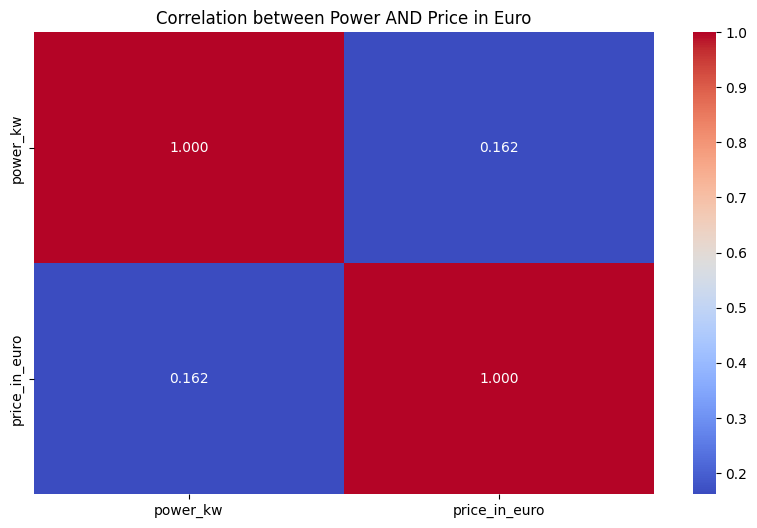

In [81]:

plt.figure(figsize=(10, 6))
sns.heatmap(df[['power_kw', 'price_in_euro']].corr(), annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Correlation between Power AND Price in Euro')
plt.show()

19.How does the average mileage vary with the year of production for each transmission type?

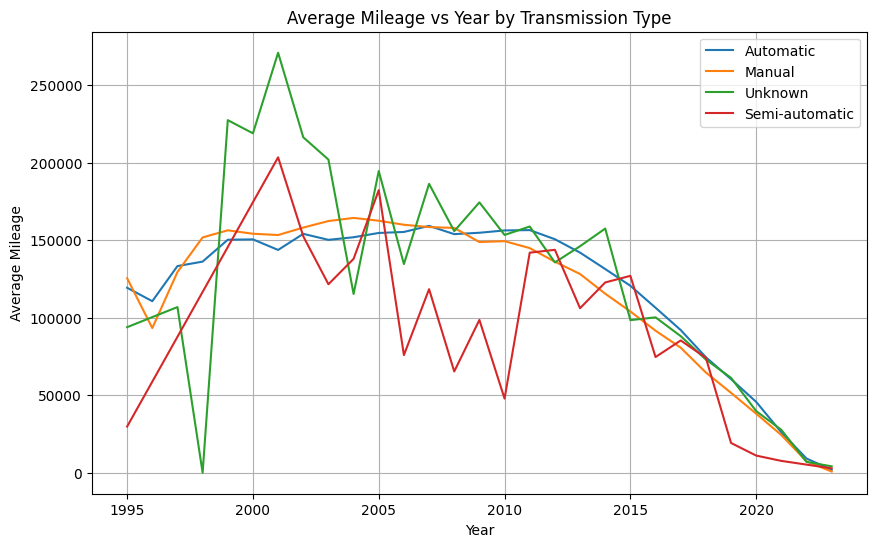

In [82]:
mileage_per_year_transmission = df.groupby(['year', 'transmission_type']).agg({'mileage_in_km': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))
for transmission_type in df['transmission_type'].unique():
    plt.plot(mileage_per_year_transmission[mileage_per_year_transmission['transmission_type'] == transmission_type]['year'],
             mileage_per_year_transmission[mileage_per_year_transmission['transmission_type'] == transmission_type]['mileage_in_km'],
             label=transmission_type)
plt.xlabel('Year')
plt.ylabel('Average Mileage')
plt.title('Average Mileage vs Year by Transmission Type')
plt.legend()
plt.grid(True)
plt.show()

21.Is there a relationship between power (PS) and fuel consumption for different transmission types?

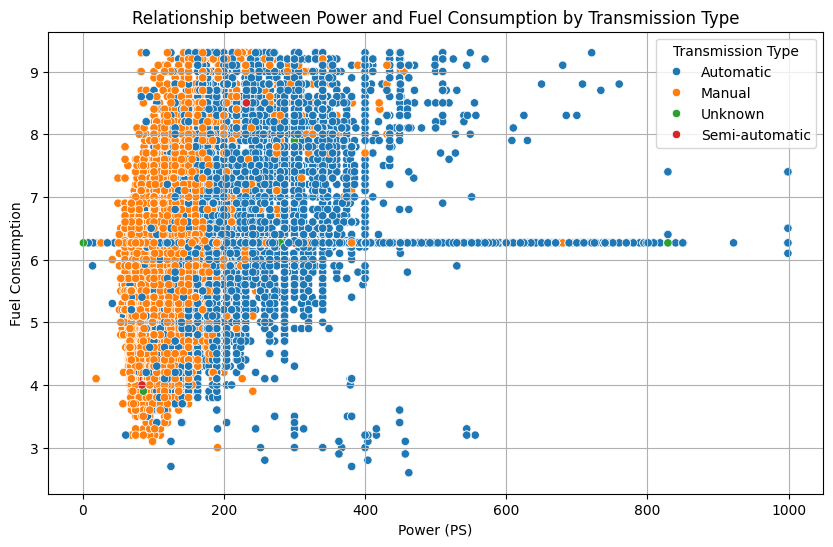

In [83]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='power_ps', y='fuel_consumption_l_100km', hue='transmission_type')
plt.xlabel('Power (PS)')
plt.ylabel('Fuel Consumption')
plt.title('Relationship between Power and Fuel Consumption by Transmission Type')
plt.grid(True)
plt.legend(title='Transmission Type')
plt.show()

22.What is the correlation between power in kilowatts (kW) and fuel consumption in liters per 100 kilometers?


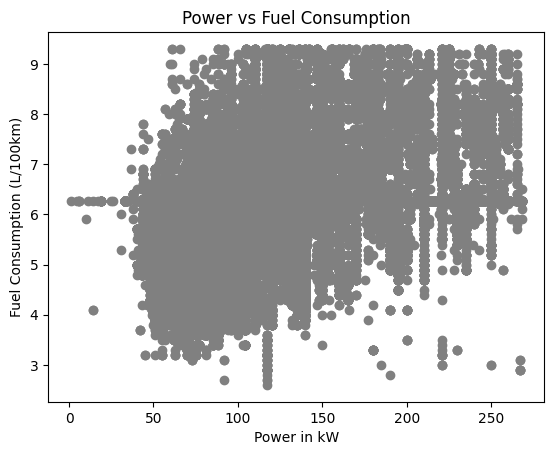

In [84]:
plt.scatter(df['power_kw'], df['fuel_consumption_l_100km'], color='gray')
plt.xlabel('Power in kW')
plt.ylabel('Fuel Consumption (L/100km)')
plt.title('Power vs Fuel Consumption')
plt.show()


23.What is the proportion of cars with automatic transmission type?

In [85]:
proportion_auto_transmission = (df['transmission_type'] == 'Automatic').mean()
print(proportion_auto_transmission)


0.532732257935396
